## Objective of the exercise

The objective of this project is to classify clothing images. For this reason, the tensorflow library will be used where the fashion_mnist data set (clothes images) is obtained. Neural network will be trained to obtain the predictions. The initial data is divided into training data and test data. Once the model is trained, it will be able to predict what type of clothing it is based on reading the image.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.3.0


In [2]:
# Read data from the keras library
fashion_mnist = keras.datasets.fashion_mnist

# Define images and labels for the train and test sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Class names of the clothing dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data Exploration

In [4]:
print('Size of train set:', len(train_images))
print('Size of test set:', len(test_images))

Size of train set: 60000
Size of test set: 10000


In [5]:
# Labels are values between 0-9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Preprocessing data

Data must be preprocessed before feeding the neural network. From the first picture of the train set, it can be seen that the values of the pixels are between 0 to 255.

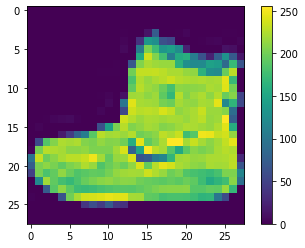

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

The data must be normalized, the train and test set values are divided by 255. Finaly, the values will be between 0 and 1.

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

The following image shows the first 25 images on the train set. Under each image appears the respective label. 

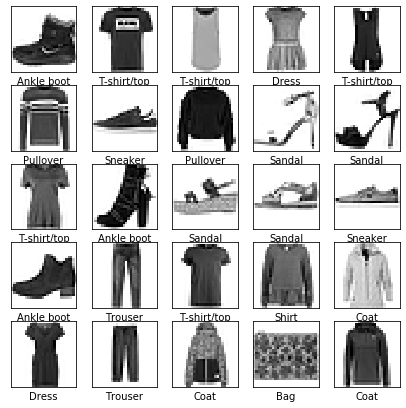

In [8]:
plt.figure(figsize=(7,7)) 
for i in range(25): 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]]) 
plt.show()

## Create the Neural Network

## Layer structure

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

## Compile the model

Before training the model, certain settings must be configured.

Loss Function - This measures how well the model performs when trained. It is about minimizing this function so that the model works correctly.

Optimizer - This defines how the model is updated based on the data.

Metrics - Metrics are used to evaluate the performance of the model with training and test data.

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training the model

As the model is trained, you can see how the loss function decreases and the accuracy metric grows.

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4971 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3749 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3378 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3119 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2949 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2801 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2679 - accuracy: 0.8987
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2559 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2486 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.238

## Evaluate Accuracy - Test set

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3253 - accuracy: 0.8877

Test accuracy: 0.8877000212669373


This difference in the accuracy metric between the training and test data is due to overfitting.

## Predictions

Once the model is trained, it is possible to make predictions. For easier interpretation, probabilities are used to identify the predictions.

In [13]:
# Softmax layer is used for probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [14]:
# Predictions with the test set
predictions = probability_model.predict(test_images)

In [15]:
# Check the higher probability and identify the category of the clothes
np.argmax(predictions[0])

9

In [16]:
# It is a boot
class_names[9]

'Ankle boot'

In [17]:
# To verify the result, check the test set labels
test_labels[0]

9

In [18]:
# create functions to graph the prediction of the images
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
  
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

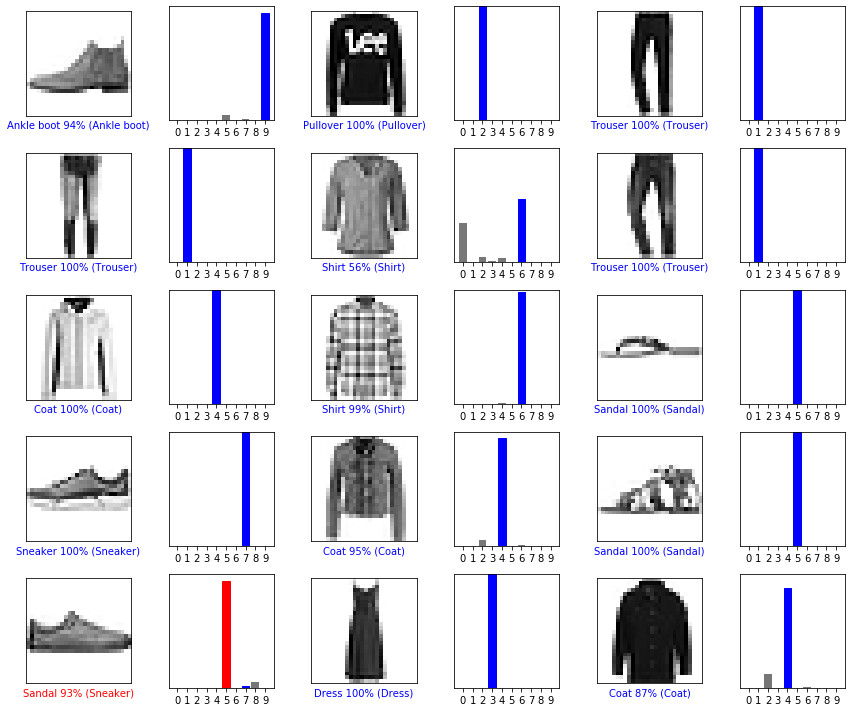

In [19]:
# Call the functions created and predict the results for the first 15 images 
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()